In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sb

In [2]:
dataset = pd.read_csv("data-curah-hujan.csv")
dataset.head()

,Stasiun,Tahun,Bulan,Jumlah Ch,Keterangan Ch
0,BINANGUN,1980,1,315.0,2
1,BINANGUN,1980,2,123.0,1
2,BINANGUN,1980,3,334.0,2
3,BINANGUN,1980,4,246.0,1
4,BINANGUN,1980,5,65.0,0


In [3]:
dataset.tail()

,Stasiun,Tahun,Bulan,Jumlah Ch,Keterangan Ch
5791,POS HUJAN WANAREJA,2019,8,NaN,3
5792,POS HUJAN WANAREJA,2019,9,NaN,3
5793,POS HUJAN WANAREJA,2019,10,NaN,3
5794,POS HUJAN WANAREJA,2019,11,NaN,3
5795,POS HUJAN WANAREJA,2019,12,NaN,3


In [4]:
from sklearn.preprocessing import LabelEncoder
for column in dataset.columns:
    if dataset[column].dtype == type(object):
        le = LabelEncoder()
        dataset[column] = le.fit_transform(dataset[column])

In [5]:
dataset[dataset.isna().any(axis=1)]

,Stasiun,Tahun,Bulan,Jumlah Ch,Keterangan Ch
26,0,1982,3,NaN,3
29,0,1982,6,NaN,3
31,0,1982,8,NaN,3
32,0,1982,9,NaN,3
33,0,1982,10,NaN,3
34,0,1982,11,NaN,3
43,0,1983,8,NaN,3
44,0,1983,9,NaN,3
49,0,1984,2,NaN,3
50,0,1984,3,NaN,3


In [6]:
dataset = dataset.dropna()

In [7]:
dataset['Jumlah Ch'] = dataset['Jumlah Ch'].astype('int')
print(dataset['Jumlah Ch'])

0       315
1       123
2       334
3       246
4        65
5        18
6        41
7       107
8        52
9       347
10      700
11      184
12      270
13      195
14      168
15      170
16      123
17      448
18      528
19       93
20      146
21      145
22      284
23      189
24      332
25       99
27      109
28        6
30        1
35      185
       ... 
5702    336
5703    167
5704    134
5705     29
5709    134
5710    467
5711    202
5733    122
5734    468
5735    454
5751    166
5752    274
5753    217
5758    380
5764     52
5769    262
5770    214
5771    232
5772    265
5773    552
5774    211
5775    198
5776     22
5777     31
5780      9
5784    202
5785    193
5787    104
5788     16
5789      0
Name: Jumlah Ch, Length: 3786, dtype: int32


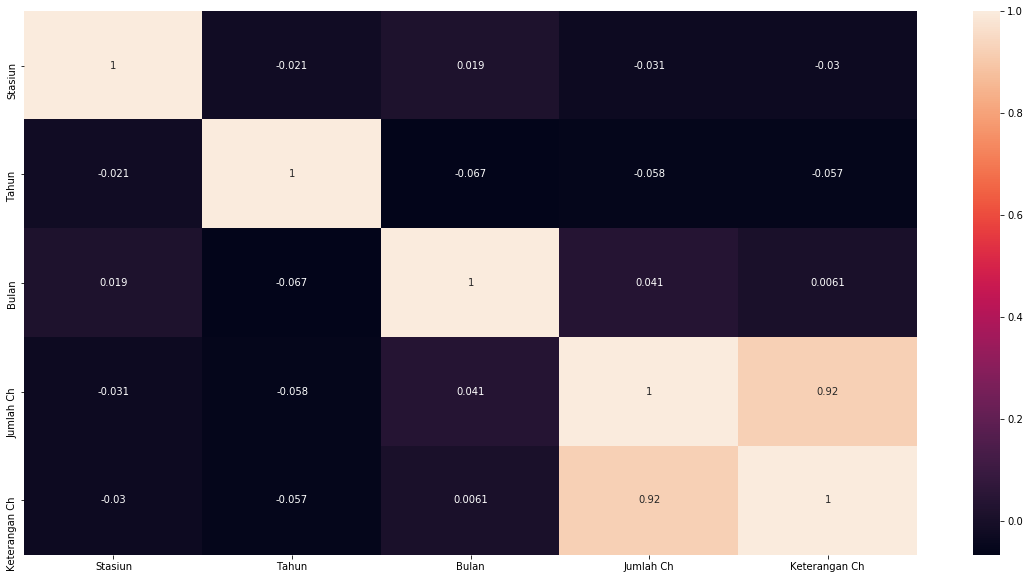

In [8]:
plt.figure(figsize=(20,10))
sb.heatmap(dataset.corr(), annot=True)

In [9]:
dataset.columns
feature_data = dataset[['Stasiun', 'Tahun', 'Bulan']]
X = np.asarray(feature_data)
y = np.asarray(dataset['Jumlah Ch'])
X[0:5]

array([[   0, 1980,    1],
       [   0, 1980,    2],
       [   0, 1980,    3],
       [   0, 1980,    4],
       [   0, 1980,    5]], dtype=int64)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=4)

In [11]:
from sklearn.preprocessing import Normalizer
data_scaled = Normalizer().fit(dataset)
normalized_data = data_scaled.transform(dataset)
normalized_data = pd.DataFrame(normalized_data, 
                               index=dataset.index, 
                               columns=dataset.columns)
print(normalized_data)

       Stasiun     Tahun     Bulan  Jumlah Ch  Keterangan Ch
0     0.000000  0.987580  0.000499   0.157115       0.000998
1     0.000000  0.998075  0.001008   0.062002       0.000504
2     0.000000  0.986067  0.001494   0.166337       0.000996
3     0.000000  0.992368  0.002005   0.123294       0.000501
4     0.000000  0.999458  0.002524   0.032811       0.000000
5     0.000000  0.999954  0.003030   0.009090       0.000000
6     0.000000  0.999779  0.003535   0.020703       0.000000
7     0.000000  0.998535  0.004034   0.053961       0.000504
8     0.000000  0.999645  0.004544   0.026253       0.000000
9     0.000000  0.984976  0.004975   0.172619       0.000995
10    0.000000  0.942800  0.005238   0.333313       0.001428
11    0.000000  0.995692  0.006034   0.092529       0.000503
12    0.000000  0.990839  0.000500   0.135046       0.000500
13    0.000000  0.995190  0.001005   0.097962       0.000502
14    0.000000  0.996422  0.001509   0.084502       0.000503
15    0.000000  0.996336

In [12]:
X_train

array([[   0, 1986,   10],
       [   8, 2000,   11],
       [  21, 1996,    3],
       ...,
       [  18, 1982,   12],
       [   0, 2001,    3],
       [  10, 1994,    2]], dtype=int64)

In [13]:
X_test

array([[  10, 2006,    7],
       [  10, 1981,    6],
       [   0, 2016,    4],
       ...,
       [  20, 2005,    7],
       [  21, 2000,    2],
       [   4, 2001,   10]], dtype=int64)

In [14]:
X_train.shape

(2271, 3)

In [15]:
X_test.shape

(1515, 3)

In [16]:
y_test.shape

(1515,)

In [17]:
y_train.shape

(2271,)

In [18]:
from sklearn import svm
from sklearn.svm import SVC

svc = SVC(kernel='linear', C = 1.0)
svc.fit(X_train, y_train)
y_predict = svc.predict(X_test)
y_predict

array([  6, 528,  59, ...,   2, 196, 370])

In [19]:
from sklearn.metrics import accuracy_score
print('Accuracy score: ', 
      accuracy_score(y_test, y_predict)*100, '%')

Accuracy score:  0.9900990099009901 %


In [20]:
y_pred = np.zeros(1515)
y_test = np.zeros(1515)

indices1 = np.random.randint(0, 1515, 3)
indices2 = np.random.randint(0, 1515, 4)
indices3 = np.random.randint(0, 1515, 5)

y_pred[indices1] = 1
y_test[indices2] = -1
y_pred[indices3] = 1
y_test[indices3] = -1

In [21]:
from sklearn.metrics import accuracy_score
print('Accuracy score: ', accuracy_score(y_test, y_pred)*100, '%')

Accuracy score:  99.20792079207921 %


In [22]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[   0    4    5]
 [   0 1503    3]
 [   0    0    0]]
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         9
         0.0       1.00      1.00      1.00      1506
         1.0       0.00      0.00      0.00         0

   micro avg       0.99      0.99      0.99      1515
   macro avg       0.33      0.33      0.33      1515
weighted avg       0.99      0.99      0.99      1515



C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Asus\Anaconda3\lib\site-pac

In [23]:
import pickle
pickle.dump(svc, open("./model.pkl","wb"))

In [32]:
import plotly.graph_objects as go

ModuleNotFoundError: No module named 'plotly'